In [21]:
import numpy as np
import math
from torch import nn


In [ ]:
A1 = np.load("./Simulations/A1.npy")
A2 = np.load("./Simulations/A2.npy")

def gerchberg_saxton(A1, A2, n_iters=200, seed = 0, eps=1e12):
    """
    Gerchberg-Saxton algorithm for phase retrieval.
    """
    # random intial phase in plane 1
    rng = np.random.default_rng(seed)
    phi0 = rng.uniform(-np.pi, np.pi, A1.shape)
    U1 = A1 * np.exp(1j * phi0)

    errors = []

    for i in range(n_iters):
        # propagate to plane 2
        U2 = np.fft.fft2(U1)
        # enforce amplitude constraint in plane 2
        U2 = A2 * np.exp(1j * np.angle(U2))
        # propagate back to plane 1
        U1 = np.fft.ifft2(U2)
        # enforce amplitude constraint in plane 1
        U1 = A1 * np.exp(1j * np.angle(U1))

        # compute error
        U2_check = np.fft.fft2(U1)
        error = np.mean((np.abs(U2_check) - A2)**2)
        errors.append(error)
    return U1, np.array(errors)

U1_est, errors = gerchberg_saxton(A1, A2, n_iters=200, seed=10)
phase_est = np.angle(U1_est)
amp_est = np.abs(U1_est)

# Plots

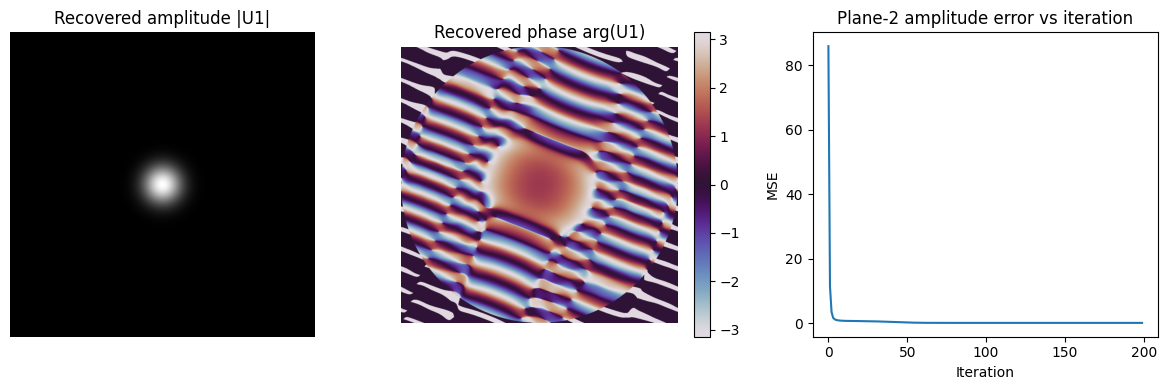

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(amp_est, cmap="gray")
plt.title("Recovered amplitude |U1|")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(phase_est, cmap="twilight")
plt.title("Recovered phase arg(U1)")
plt.axis("off")
plt.colorbar()

plt.subplot(1,3,3)
plt.plot(errors)
plt.title("Plane-2 amplitude error vs iteration")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.tight_layout()
plt.show()
